In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


### Preprocessing the data

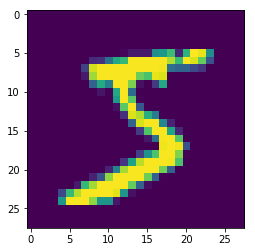

In [14]:
plt.imshow(X_train[0] )

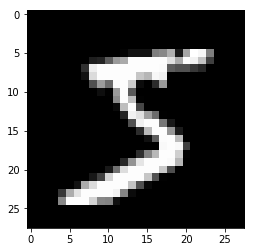

In [15]:
plt.imshow(X_train[0], cmap='gray')

In [16]:
y_train[0]

5

### Reshape image data

In [18]:
image_height, image_width=28,28

In [20]:
X_train = X_train.reshape(60000, image_height*image_width)

In [21]:
X_test = X_test.reshape(10000, image_height*image_width)

In [22]:
X_train.shape

(60000, 784)

In [26]:
X_train = X_train.astype('float32')

In [27]:
X_test = X_test.astype('float32')

In [28]:
X_train /= 255.0

In [29]:
X_test /= 255.0

In [34]:
y_train = to_categorical(y_train, 10)

In [36]:
y_test = to_categorical(y_test, 10)

### Model

In [38]:
model = Sequential()

In [39]:
model.add(Dense(512, activation='relu', input_shape=(784,)))

In [40]:
model.add(Dense(512, activation='relu'))

In [44]:
model.add(Dense(10, activation='softmax'))

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
784*512+512

401920

In [50]:
512*512+512

262656

In [51]:
512*10+10

5130

In [52]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.1828 - acc: 0.9437 - val_loss: 0.1127 - val_acc: 0.9649
Epoch 2/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0793 - acc: 0.9758 - val_loss: 0.0711 - val_acc: 0.9781
Epoch 3/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0563 - acc: 0.9830 - val_loss: 0.0834 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0453 - acc: 0.9856 - val_loss: 0.0695 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0346 - acc: 0.9886 - val_loss: 0.0806 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.0288 - acc: 0.9910 - val_loss: 0.0983 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.

### What is the Accuracy of the model

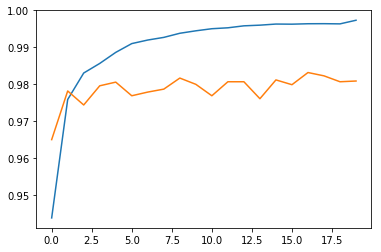

In [58]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

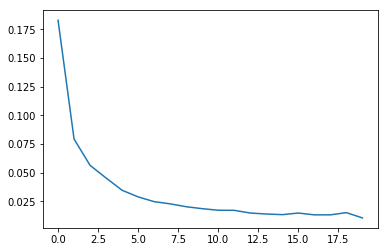

In [59]:
plt.plot(history.history['loss'])


In [60]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 36us/step


In [61]:
score

[0.12087831997350597, 0.9808]

### Convoluted Neural Networks